<a href="https://colab.research.google.com/github/alessandrasarah/alessandrasarah/blob/main/Projeto_completo_DataGirls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3253762356.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  turnover_faixa_tempo = df.groupby("Faixa_Tempo_Empresa")["Saiu_Flag"].mean().sort_values(ascending=False) * 100
/tmp/ipython-input-3253762356.py:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perfil_risco = df.groupby(["Genero", "Faixa_Idade", "HoraExtra"])["Saiu_Flag"].mean().sort_values(ascending=False).head(5) * 100
/tmp/ipython-input-3253762356.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obs

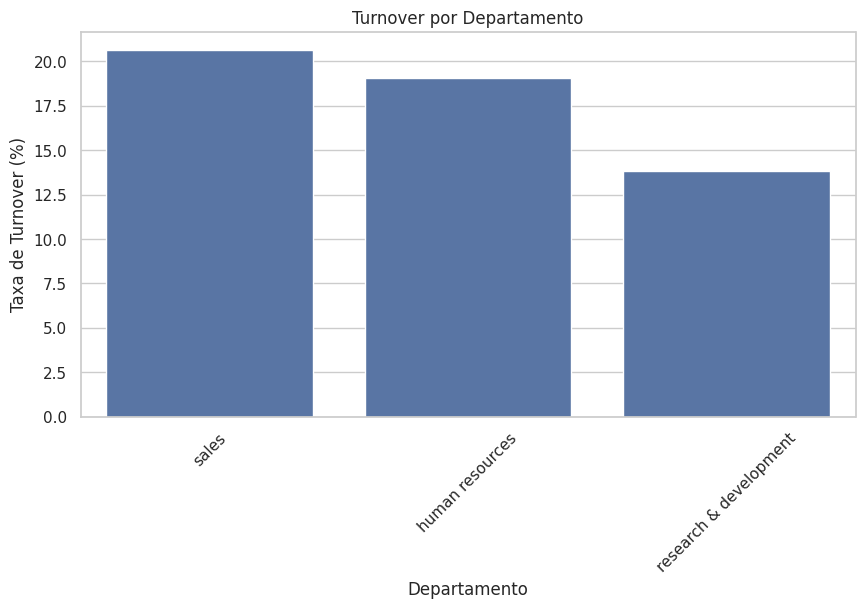

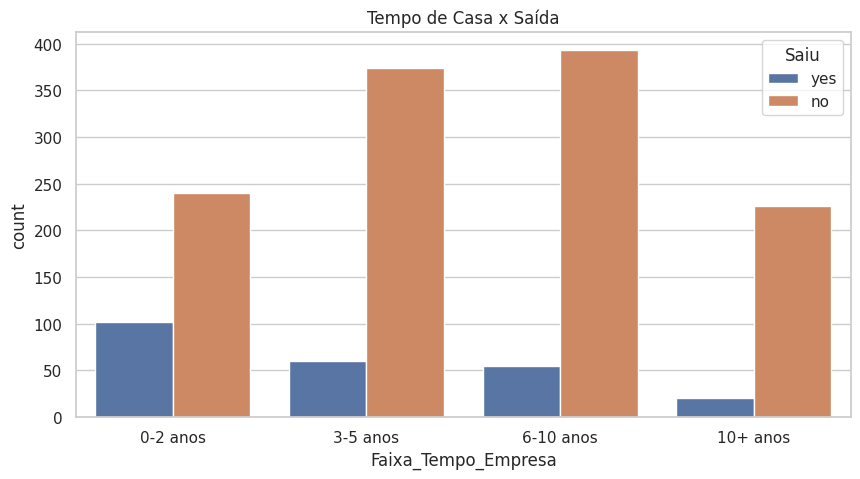

✅ Análise concluída. Arquivos salvos: RH_Dataset_Tratado.xlsx e Resumo_Insights.txt


In [ ]:
# ===============================
# 1. Importar bibliotecas
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# ===============================
# 2. Ler o arquivo CSV
# ===============================
df = pd.read_csv("RH-DATASET.csv", sep=";")

# ===============================
# 3. Renomear colunas
# ===============================
rename_dict = {
    "Age": "Idade",
    "Attrition": "Saiu",
    "BusinessTravel": "Frequencia_Viagem",
    "DailyRate": "Taxa_Diaria",
    "Department": "Departamento",
    "DistanceFromHome": "Distancia_Casa_km",
    "Education": "Educacao_Nivel",
    "EducationField": "Area_Formacao",
    "EnvironmentSatisfaction": "Satisfacao_Ambiente",
    "Gender": "Genero",
    "HourlyRate": "Taxa_Horaria",
    "JobInvolvement": "Envolvimento_Trabalho",
    "JobLevel": "Nivel_Cargo",
    "JobRole": "Cargo",
    "JobSatisfaction": "Satisfacao_Trabalho",
    "MaritalStatus": "Estado_Civil",
    "MonthlyIncome": "Salario_Mensal",
    "MonthlyRate": "Taxa_Mensal",
    "NumCompaniesWorked": "Qtd_Empresas_Anterior",
    "OverTime": "HoraExtra",
    "PercentSalaryHike": "Aumento_Salarial_Perc",
    "PerformanceRating": "Avaliacao_Desempenho",
    "RelationshipSatisfaction": "Satisfacao_Relacionamento",
    "StockOptionLevel": "Nivel_Opcoes_Acoes",
    "TotalWorkingYears": "Anos_Trabalho_Total",
    "TrainingTimesLastYear": "Treinamentos_Ano",
    "WorkLifeBalance": "Equilibrio_Vida_Trabalho",
    "YearsAtCompany": "Anos_Empresa",
    "YearsInCurrentRole": "Anos_Cargo_Atual",
    "YearsSinceLastPromotion": "Anos_Desde_Promocao",
    "YearsWithCurrManager": "Anos_Com_Gerente"
}
df.rename(columns=rename_dict, inplace=True)

# ===============================
# 4. Limpeza dos dados
# ===============================
df.drop_duplicates(inplace=True)
df.fillna({
    "Satisfacao_Ambiente": df["Satisfacao_Ambiente"].median(),
    "Satisfacao_Trabalho": df["Satisfacao_Trabalho"].median()
}, inplace=True)

cols_texto = ["Saiu", "Departamento", "Genero", "Estado_Civil", "Cargo", "Frequencia_Viagem", "Area_Formacao", "HoraExtra"]
for col in cols_texto:
    df[col] = df[col].str.strip().str.lower()

# ===============================
# 5. Criar colunas de segmentação
# ===============================
df["Faixa_Idade"] = pd.cut(df["Idade"], bins=[17,29,39,49,59], labels=["<30", "30-39", "40-49", "50+"])
df["Faixa_Distancia"] = pd.cut(df["Distancia_Casa_km"], bins=[-1,5,10,50], labels=["0-5 km", "6-10 km", "11+ km"])
df["Faixa_Tempo_Empresa"] = pd.cut(df["Anos_Empresa"], bins=[-1,2,5,10,40], labels=["0-2 anos", "3-5 anos", "6-10 anos", "10+ anos"])
df["Saiu_Flag"] = df["Saiu"].map({"yes": 1, "no": 0})

# ===============================
# 6. KPIs principais
# ===============================
taxa_turnover = df["Saiu_Flag"].mean() * 100
turnover_departamento = df.groupby("Departamento")["Saiu_Flag"].mean().sort_values(ascending=False) * 100
turnover_cargo = df.groupby("Cargo")["Saiu_Flag"].mean().sort_values(ascending=False) * 100
turnover_faixa_tempo = df.groupby("Faixa_Tempo_Empresa")["Saiu_Flag"].mean().sort_values(ascending=False) * 100

# ===============================
# 7. Responder perguntas de negócio
# ===============================

# 1. Perfil com maior risco
perfil_risco = df.groupby(["Genero", "Faixa_Idade", "HoraExtra"])["Saiu_Flag"].mean().sort_values(ascending=False).head(5) * 100

# 2. Correlação com saída
correlacoes = df.corr(numeric_only=True)["Saiu_Flag"].sort_values(ascending=False)

# 3. Departamento/cargo crítico
departamento_critico = turnover_departamento.head(1)
cargo_critico = turnover_cargo.head(1)

# 4. Padrão no tempo de casa
tempo_casa_padrao = turnover_faixa_tempo

# ===============================
# 8. Insights & Recomendações
# ===============================
insights = []
if "yes" in df["HoraExtra"].unique() and df[df["HoraExtra"]=="yes"]["Saiu_Flag"].mean() > 0.2:
    insights.append("🔹 Alto turnover entre funcionários com horas extras — considerar controle de jornada.")

if df.groupby("Faixa_Distancia")["Saiu_Flag"].mean().idxmax() == "11+ km":
    insights.append("🔹 Funcionários que moram longe têm maior risco — avaliar incentivos de transporte ou home office.")

if df["Satisfacao_Trabalho"].mean() < 2.5:
    insights.append("🔹 Nível de satisfação baixo — sugerir programas de engajamento e treinamentos.")

# ===============================
# 9. Visualizações (exemplos para dashboard)
# ===============================

# Turnover por Departamento
sns.barplot(x=turnover_departamento.index, y=turnover_departamento.values)
plt.xticks(rotation=45)
plt.ylabel("Taxa de Turnover (%)")
plt.title("Turnover por Departamento")
plt.show()

# Distribuição do Tempo de Casa x Saída
sns.countplot(x="Faixa_Tempo_Empresa", hue="Saiu", data=df)
plt.title("Tempo de Casa x Saída")
plt.show()

# ===============================
# 10. Resumo para Power Automate
# ===============================
limite_alerta = 20  # %
alertas = []
for dep, taxa in turnover_departamento.items():
    if taxa > limite_alerta:
        alertas.append(f"O setor {dep} teve {taxa:.1f}% de turnover no último período.")

resumo_alerta = "\n".join(alertas) if alertas else "Nenhum setor ultrapassou o limite de turnover."

# ===============================
# 11. Salvar resultados
# ===============================
df.to_excel("RH_Dataset_Tratado.xlsx", index=False)

with open("Resumo_Insights.txt", "w", encoding="utf-8") as f:
    f.write("📊 Taxa geral de turnover: {:.2f}%\n".format(taxa_turnover))
    f.write("\n🏆 Perfil de maior risco:\n")
    f.write(str(perfil_risco))
    f.write("\n\n📌 Insights:\n")
    for i in insights:
        f.write(f"- {i}\n")
    f.write("\n📧 Resumo para alerta Power Automate:\n")
    f.write(resumo_alerta)

print("✅ Análise concluída. Arquivos salvos: RH_Dataset_Tratado.xlsx e Resumo_Insights.txt")
